In [36]:
import torch
import random


import numpy as np
import pandas as pd
import pickle as pkl
import gymnasium as gym
import matplotlib.pyplot as plt

from IPython.display import Image
from CartpoleRL import CartPoleAgent, get_trajectory, update_policy, speed_gameplay

In [45]:
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

In [46]:
num_sessions = 1000 

In [47]:
total_rewards = []

cart_pole_agent = CartPoleAgent(4,2,24)
env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset(seed=42)

for game_session in range(num_sessions):
    actions, rewards, observations, log_probabilities = get_trajectory(
        env,
        cart_pole_agent,
        make_gif=False,
    )
    update_policy(cart_pole_agent, log_probabilities, rewards, gamma=0.99)
    total_rewards.append(rewards.sum())




In [40]:
actions, rewards, observations, log_probabilities = get_trajectory(
        env,
        cart_pole_agent,
        make_gif=True,
        gif_path="test.gif",
        fps=60
    )

MovieWriter ffmpeg unavailable; using Pillow instead.


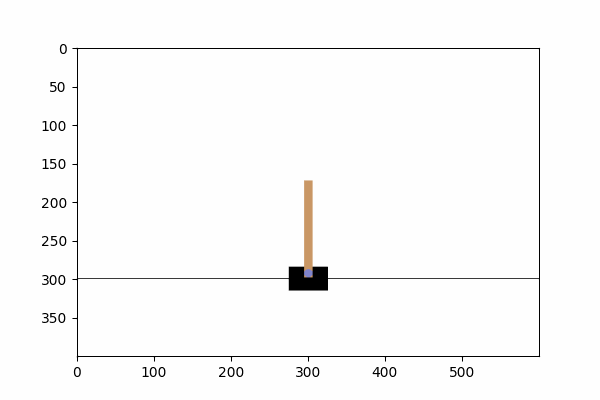

In [41]:
speed_gameplay("test.gif",10000)
Image("test.gif",width=600,height=40)

In [48]:
df = pd.DataFrame(total_rewards, columns=["rewards"]).reset_index()

In [51]:
df.head(10)==compare

,index,rewards
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [44]:
compare = df.head(10)

In [50]:
compare

,index,rewards
0,0,13.0
1,1,16.0
2,2,32.0
3,3,15.0
4,4,11.0
5,5,34.0
6,6,14.0
7,7,26.0
8,8,39.0
9,9,18.0


In [11]:
with open("baseline_RL_model.pkl","wb") as file:
    pkl.dump([cart_pole_agent, df],file)